In [1]:
import sys
sys.path.append('./GedankenNet-mps/GedankenNet')

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Update this to where the .mat file really lives
file_path = Path('./GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat').absolute()
print(file_path.exists())

# 1. Open and list contents
with h5py.File(file_path, 'r') as f:
    print("=== Contents of the MAT file ===")
    f.visititems(lambda name, obj: print(f"{name}: shape={obj.shape}, dtype={obj.dtype}") 
                 if isinstance(obj, h5py.Dataset) else None)
    
    # 2. Read in datasets
    signal = np.array(f['signal'])
    u1     = np.array(f['u1'])

# 3. Summaries
print("\n=== Dataset summaries ===")
print(f"signal: shape={signal.shape}, dtype={signal.dtype}, values=\n{signal}")
print(f"u1: shape={u1.shape}, dtype={u1.dtype}")
print(f"abs(u1): min={np.abs(u1).min():.3e}, max={np.abs(u1).max():.3e}, mean={np.abs(u1).mean():.3e}")

# 4. Show u1 magnitude
plt.imshow(np.abs(u1))
plt.title('Magnitude of u1')
plt.axis('off')
plt.show()


True


OSError: Unable to synchronously open file (file signature not found)

In [9]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jul 27 18:26:34 2018',
 '__version__': '1.0',
 '__globals__': [],
 'lambda': array([[6.328e-07]]),
 'pitch': array([[2.2e-06]]),
 'signal': array([[-1]], dtype=int16),
 'z': array([[0.15632]]),
 'sx': array([[-0.]]),
 'sy': array([[0]], dtype=uint8),
 'u1': array([[ 6.30684159e-16-4.94368289e-16j,  4.51638985e-16-3.29379735e-16j,
         -1.14922916e-15-7.05858036e-16j, ...,
         -1.42979082e-15-8.03143164e-17j, -4.54198411e-15-3.44988742e-16j,
         -5.02925696e-15+3.69736745e-17j],
        [-5.01920555e-17-1.97514091e-15j,  4.17769479e-16-1.24681703e-15j,
         -5.77058136e-16+1.27318418e-15j, ...,
         -1.19654390e-15-3.73780410e-15j, -2.50359533e-15+7.02499428e-16j,
         -3.49841215e-15+2.39231746e-15j],
        [ 1.18918111e-15+2.94143629e-16j, -9.31898584e-16+1.01388092e-15j,
         -1.70980118e-15+1.14806821e-15j, ...,
         -1.68810714e-16-9.11193006e-16j,  3.20279028e-15+3.04504653

In [7]:
from scipy.io import loadmat
data = loadmat('GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat')
print([k for k in data.keys() if not k.startswith('__')])

['inputData', 'targetData']


dict_keys(['__header__', '__version__', '__globals__', 'inputData', 'targetData'])


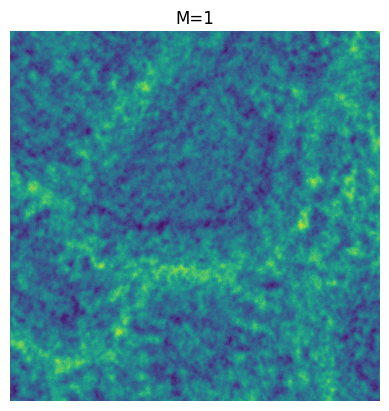

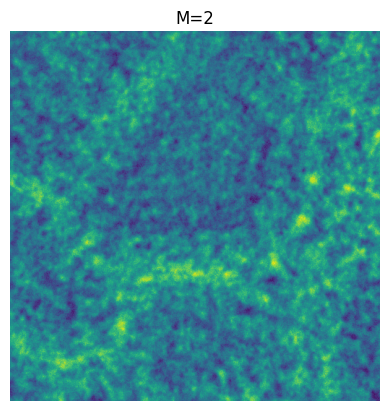

In [11]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load data
mat = scipy.io.loadmat('GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat')
print(mat.keys())
amp1, amp2 = mat['inputData'][:, :, 0], mat['inputData'][:, :, 1]

# Plot amplitude
plt.figure()
plt.imshow(amp1)
plt.title('M=1')
plt.axis('off')
plt.show()

# Plot phase
plt.figure()
plt.imshow(amp2)
plt.title('M=2')
plt.axis('off')
plt.show()

(512, 512, 2)


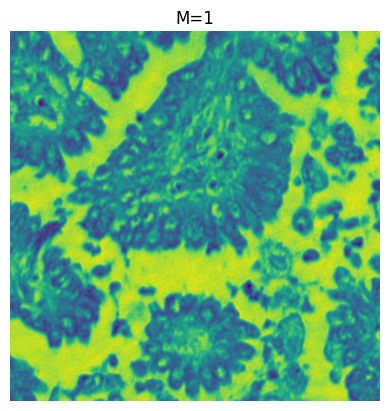

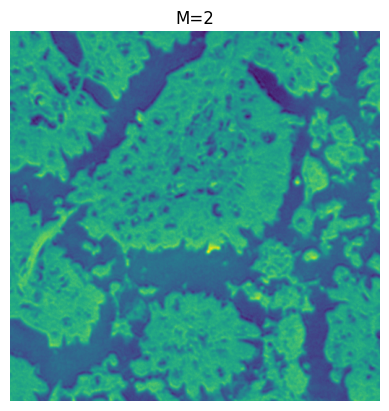

In [13]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load data
mat = scipy.io.loadmat('GedankenNet-mps/demo_data/stained_tissue/lung_demo_FOV1.mat')
amp1, amp2 = mat['targetData'][:, :, 0], mat['targetData'][:, :, 1]

# Plot amplitude
plt.figure()
plt.imshow(amp1)
plt.title('M=1')
plt.axis('off')
plt.show()

# Plot phase
plt.figure()
plt.imshow(amp2)
plt.title('M=2')
plt.axis('off')
plt.show()